# E-commerce Customer Churn Analysis & Prediction

By:

- Benedict Emannuel
- Bryan Stevanus

## 1. Business Problem Understanding

### 1.1. Context

E-commerce is the buying and selling of goods and services over the internet using digital devices. In order to maintain profitability, an e-commerce business can use several metrics to evaluate its performance, identify problems it is currently or will be facing, and make plans and decisions to overcome said problems. One such metric is customer churn.

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company or cease using its products or services over a given period. In the context of e-commerce, customer churn is particularly critical as it directly impacts revenue and long-term business sustainability. A high customer churn negatively impacts the business and puts a lot of pressure on the marketing team. This is because any customer gained would only purchase from the business only for a short while, which pressures the marketing team to seek out more customers, only for those hard sought customers to disappear in a short time frame, thus limiting the long-term gain from the marketing team’s effort.

In contrast, a low customer churn means that many customers continue to purchase products from the business, and any increase in customer from the marketing team’s effort have a positive cumulative impact to the business long-term profitability. High churn rates can indicate underlying issues such as poor customer satisfaction, inadequate service quality, or more attractive offers from competitors. Understanding the reasons behind customer churn involves analyzing customer behavior, transaction history, and engagement patterns to identify factors that contribute to their decision to leave. Effective churn analysis enables businesses to proactively address these issues, implement retention strategies, and ultimately enhance customer loyalty and lifetime value.

According to [this](https://www.clientsuccess.com/resources/true-cost-customer-churn-part-1) article, the financial cost of customer churn comes in 3 fold, which are Lose Recurring Revenue, Lose Expansion Opportunity Revenue, and Cost to Acquire New Customers. Lose Recurring Revenue means that when the customer stops purchasing from the business, the business can not expect any revenue from that customer in the future. Lose Expansion Opportunity Revenue, according to the article, existing customers are 65% more likely to accept upselling compared to to the 13% of new prospects, which means that in addition to missing out recurring revenue, the business also loses out on any oppurtunity increase revenue from upselling their customers. Finally Cost to Acquire New Customers, means the business needs to invest more money to find new customers or reacquire those churned customers.

Lets use an example to better quantify the cost of customer churn. Let's say an e-commerce business has lost 100 customers in a year, a single customer generates \$100 a year. That means the company has lost \$10000 worth of recurring revenue for the following year. In addition, assuming the business can upsell to their customer to and aditional \$20 a year 65% of the time, thats \$1300 potential revenue increase lost. And finally, assuming it costs \$100 to acquire new customers, then it would cost the business \$10000 to regain the same amount of customers. Ultimately it would cost the business a total of \$21300 the following year.

### 1.2. Problem Statement

In the dynamic and competitive e-commerce industry, retaining customers is crucial for maintaining steady revenue and achieving long-term success. However, understanding the factors that drive customer churn—when customers stop purchasing from the platform—remains a significant challenge.

A certain ecommerce company called company X, had a good reputation for years, however they received the data about their overall performance for some period. It can be seen that several customer churned and decided to use another ecommerce company service.

Company X wants to know which factor that cause their customer churned, and they want to implement a machine learing method to create a prediction based on the data they received, to prevent more customer churned in the future.

### 1.3. Analysis Goal

- Create a machine learning model that could predict if a customer would churn based on data provided by this dataset.
-Identify which factors that would cause a customer to churn.
- The final goal of the development of this machine learning model is to accurately predict customers that will churn and the relevant features that cause customers to churn. This would provide information to stakeholders to better understand what causes customer churn and devise strategies, such as discounts and promotions, to reduce and prevent customer churn



This project aims to analyze e-commerce customer churn data to identify patterns and predictors of churn, providing actionable insights to reduce churn rates. By employing data analytics and machine learning techniques to predict the churn rates in the future.

The prediction method is classification method, based on the data provided by the company which is a categorical data. We will try to use several algorithms such as XGBoost, KNN, or Random Forest

### 1.4. Stakeholders

- `Marketing & Sales Team in E-commerce company`: They can use the insights to create targeted campaigns aimed at retaining customers who are at risk of churning. They can leverage the data to identify at-risk customers and work on retention strategies to keep them engaged.

### 1.5. Analytic Apprioach

- Analyze the data to better understand the data and the value ranges of each feature/column

- Prepare the data by cleaning the data from missing and duplicate values

- Determine which preprocessing methods to use for each feature and create a column transformer and pipeline

- Determine which estimator has the best performance based on evaluation metric, specifically F1-score

- Perform hyperparameter tuning to the best estimator to improve model performance

- Evaluate model using evaluation metrics, namely Accuracy, Recall, Precision, and F1-score

- Perform model summary using SHAP to determine which features significantly impact car price prediction.

## 1.6 Metric Evaluation

To better assess a machine learning model's ability to classify each class, we will use confusion matrix, as seen below:

|  | Actual Positive | Actual Negative |
|---|---|---|
| Predicted Positive | True Positve | False Positve |
| Predicted Negative | False Negative | True Negative |

This table summarizes a model's performance by showing the number of correct and incorrect predictions for each class. From that table there are 2 types errors:
- Type 1 error = False Positives (FP):  
when a model incorrectly predicts a row with a positive class when in reality it is a negative class, this is called a `false positive`. This error results in investing resources to retain customers that would not churn, thus wasting resources.
- Type 2 error = False Negatives (FN):  
when a model incorrectly predicts a row with a negative class when in reality it is a positive class, this is called a `false negative`. This error results in ignoring customers that, in reality, does churn, which leads to lost revenue.

Confusion Matrix Term:

- True Positive (TP): The model predicts a customer will churn, and they actually do churn.

- True Negative (TN): The model predicts a customer will not churn, and they actually do not churn.

- False Positive (FP): The model predicts a customer will churn, but they actually do not churn.

- False Negative (FN): The model predicts a customer will not churn, but they actually do churn.





We are going to use F1-score for metric evaluation step. The F1 score is calculated as the harmonic mean of precision and recall. A harmonic mean is a type of average calculated by summing the reciprocal of each value in a data set and then dividing the number of values in the dataset by that sum. The value of the F1 score lies between 0 to 1 with 1 being a better.


Formula of F1-Score:

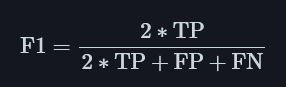

F1-score is good at maintaining balance between precision and recall, balance between these 2 metrics is crucial because it is possible that recall is high while precision is low or vice versa. Recall is a metric that calculates how many data of a class (for example churned (1)) is correctly predicted. However, you can get a recall score of 1 (100%) by predicting all data as churned, but the precision score will be very poor. Thus a balance between the two metrics, provided by f1-score is suited for evaluating this machine learning model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score,  cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/finpro/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/finpro


In [ ]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")

## 2. Data Understanding

Source: [Link](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

Features in the dataset are divided into numerical (integer/float) and categorical data, and each row of data represents customer data and transactions in an e-commerce platform.

However there are several problems in this data, such as cells with null or empty values.

## 3. Data Exploration

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


| Feature Name | Description |
|---|---|
| CustomerID | Unique customer ID |
| Churn | Flag indicating whether the customer churned (1) or not (0) |
| Tenure | Tenure of the customer in the organization |
| PreferredLoginDevice | Preferred device used by the customer to login (e.g., mobile, web) |
| CityTier | City tier classification (e.g., Tier 1, Tier 2, Tier 3) |
| WarehouseToHome | Distance between the warehouse and the customer's home |
| PreferredPaymentMode | Preferred payment method used by the customer (e.g., credit card, debit card, cash on delivery) |
| Gender | Gender of the customer |
| HourSpendOnApp | Number of hours spent on the mobile application or website |
| NumberOfDeviceRegistered | Total number of devices registered to the customer's account |
| PreferedOrderCat | Preferred order category of the customer in the last month |
| SatisfactionScore | Customer's satisfaction score with the service |
| MaritalStatus | Marital status of the customer |
| NumberOfAddress | Total number of addresses added to the customer's account |
| OrderAmountHikeFromlastYear | Percentage increase in order value compared to last year |
| CouponUsed | Total number of coupons used by the customer in the last month |
| OrderCount | Total number of orders placed by the customer in the last month |
| DaySinceLastOrder | Number of days since the customer's last order |
| CashbackAmount | Average cashback received by the customer in the last month |

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.duplicated().sum()

0

It can be seen from the results above that in this e-commerce dataset there is no duplicate data (assuming there is no data repetition). Then the CustomerID variable will also be dropped because it has no particular relevance to EDA and machine learning models.

In [ ]:
df.isnull().sum()
## dihapus kalo tidak signifikan atau tidak ada pola yang berarti

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


## 3.1 Data Cleaning

### 3.1.1 Handling Missing Values

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CustomerID,int64,0,0.00,5630,"[50517, 53422]"
1,Churn,int64,0,0.00,2,"[0, 1]"
2,Tenure,float64,264,4.69,36,"[5.0, 25.0]"
3,PreferredLoginDevice,object,0,0.00,3,"[Phone, Computer]"
4,CityTier,int64,0,0.00,3,"[1, 2]"
5,WarehouseToHome,float64,251,4.46,34,"[12.0, 9.0]"
6,PreferredPaymentMode,object,0,0.00,7,"[Credit Card, UPI]"
7,Gender,object,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,255,4.53,6,"[2.0, 4.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 6]"


First we will delete the `CustomerID` column, because this is just a unique ID that differentiates each candidate and is not useful for the analysis we will do and is also not useful in creating machine learning models later.

As additional information, we can find out that there is no duplicate data from our dataset by looking at the number of unique data from the `CustomerID` column, where the number of unique data is the same as the total amount of our data, therefore our dataset this time does not have duplicate data .


In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CustomerID,int64,0,0.00,5630,"[55483, 52014]"
1,Churn,int64,0,0.00,2,"[0, 1]"
2,Tenure,float64,264,4.69,36,"[8.0, 25.0]"
3,PreferredLoginDevice,object,0,0.00,3,"[Mobile Phone, Phone]"
4,CityTier,int64,0,0.00,3,"[1, 3]"
5,WarehouseToHome,float64,251,4.46,34,"[16.0, 30.0]"
6,PreferredPaymentMode,object,0,0.00,7,"[COD, UPI]"
7,Gender,object,0,0.00,2,"[Male, Female]"
8,HourSpendOnApp,float64,255,4.53,6,"[1.0, 5.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[2, 3]"


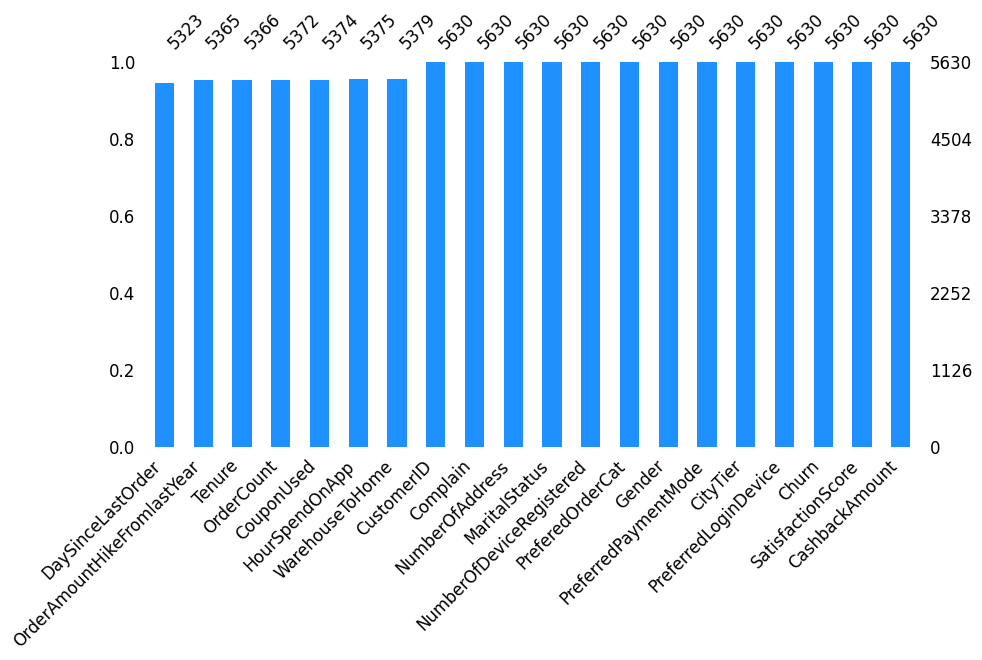

In [ ]:
import missingno

missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Based on this analysis, there are null or missing values on column `DaySinceLastOrder`, `OrderAmountHikeFromlastYear`, `Tenure`, `OrderCount`, `CouponUsed`, `HourSpendOnApp`, and `WarehouseToHome`

Moreover, `DaySinceLastOrder` column has the most missing values, while `WarehouseToHome`has the least missing values

<Axes: >

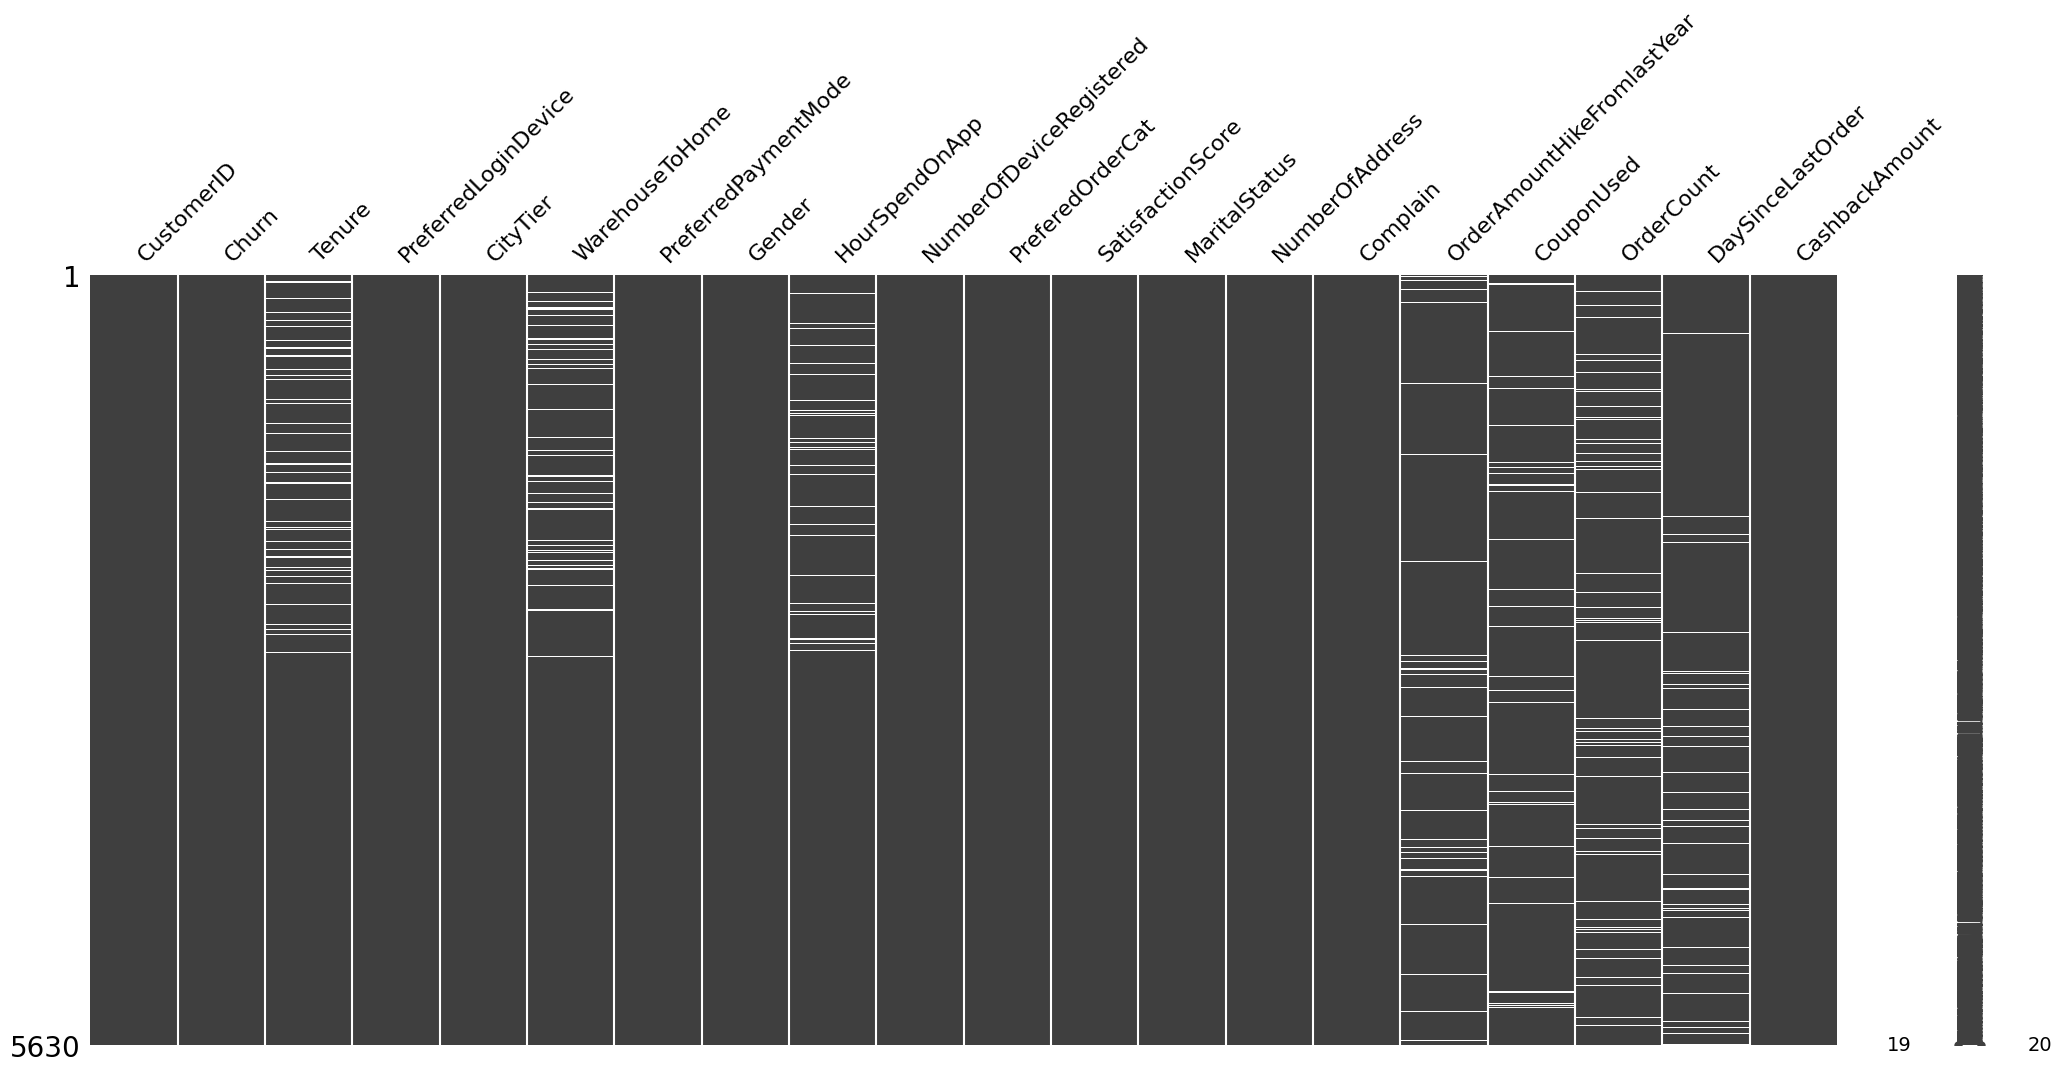

In [ ]:
missingno.matrix(df)

Tenure, PreferredLoginDevice, PreferredPaymentMode, HourSpendOnApp, WarehouseToHome, PrefeeredOrderCat, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount turns out has missing values, based on the matrix above


### 3.1.2 Heatmap

Below we plot a Heatmap plot showing nullity correlations between the various columns that have missing data in our dataset.

Nullity correlations range from -1 to 1.

- -1 - Negative Correlation which states that if the value of one variable is present then the value of another variable must not be present.
- 0 - There is no correlation which states that the values ​​of the variables present or absent do not influence each other.
- 1 - Positive Correlation which states that if the value of one variable exists then the value of the other must exist

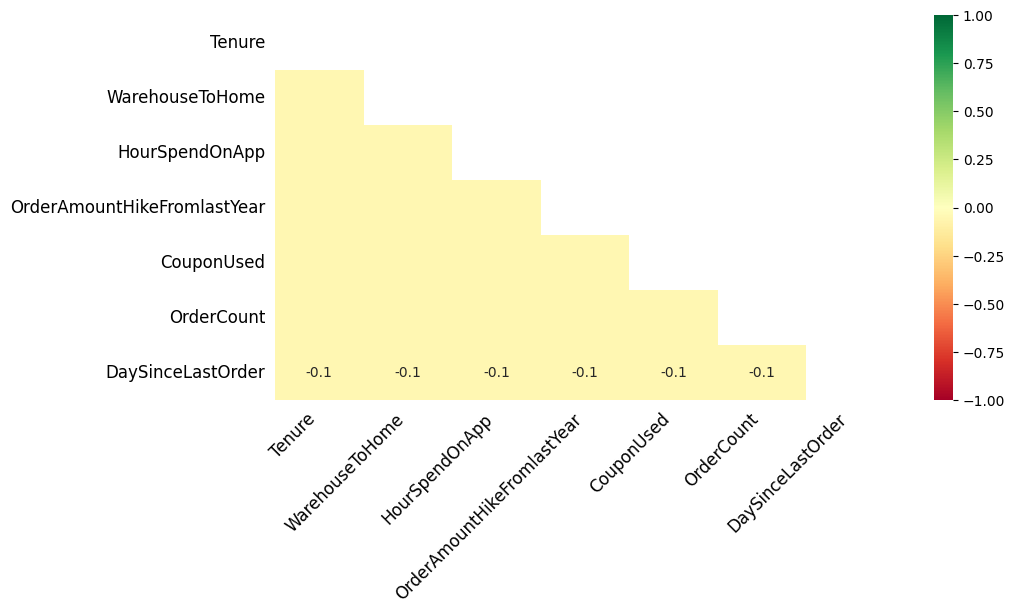

In [ ]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

It can be seen from the heatmap above, that on average, the missing values/missing data between one column and the others are not related/correlated.

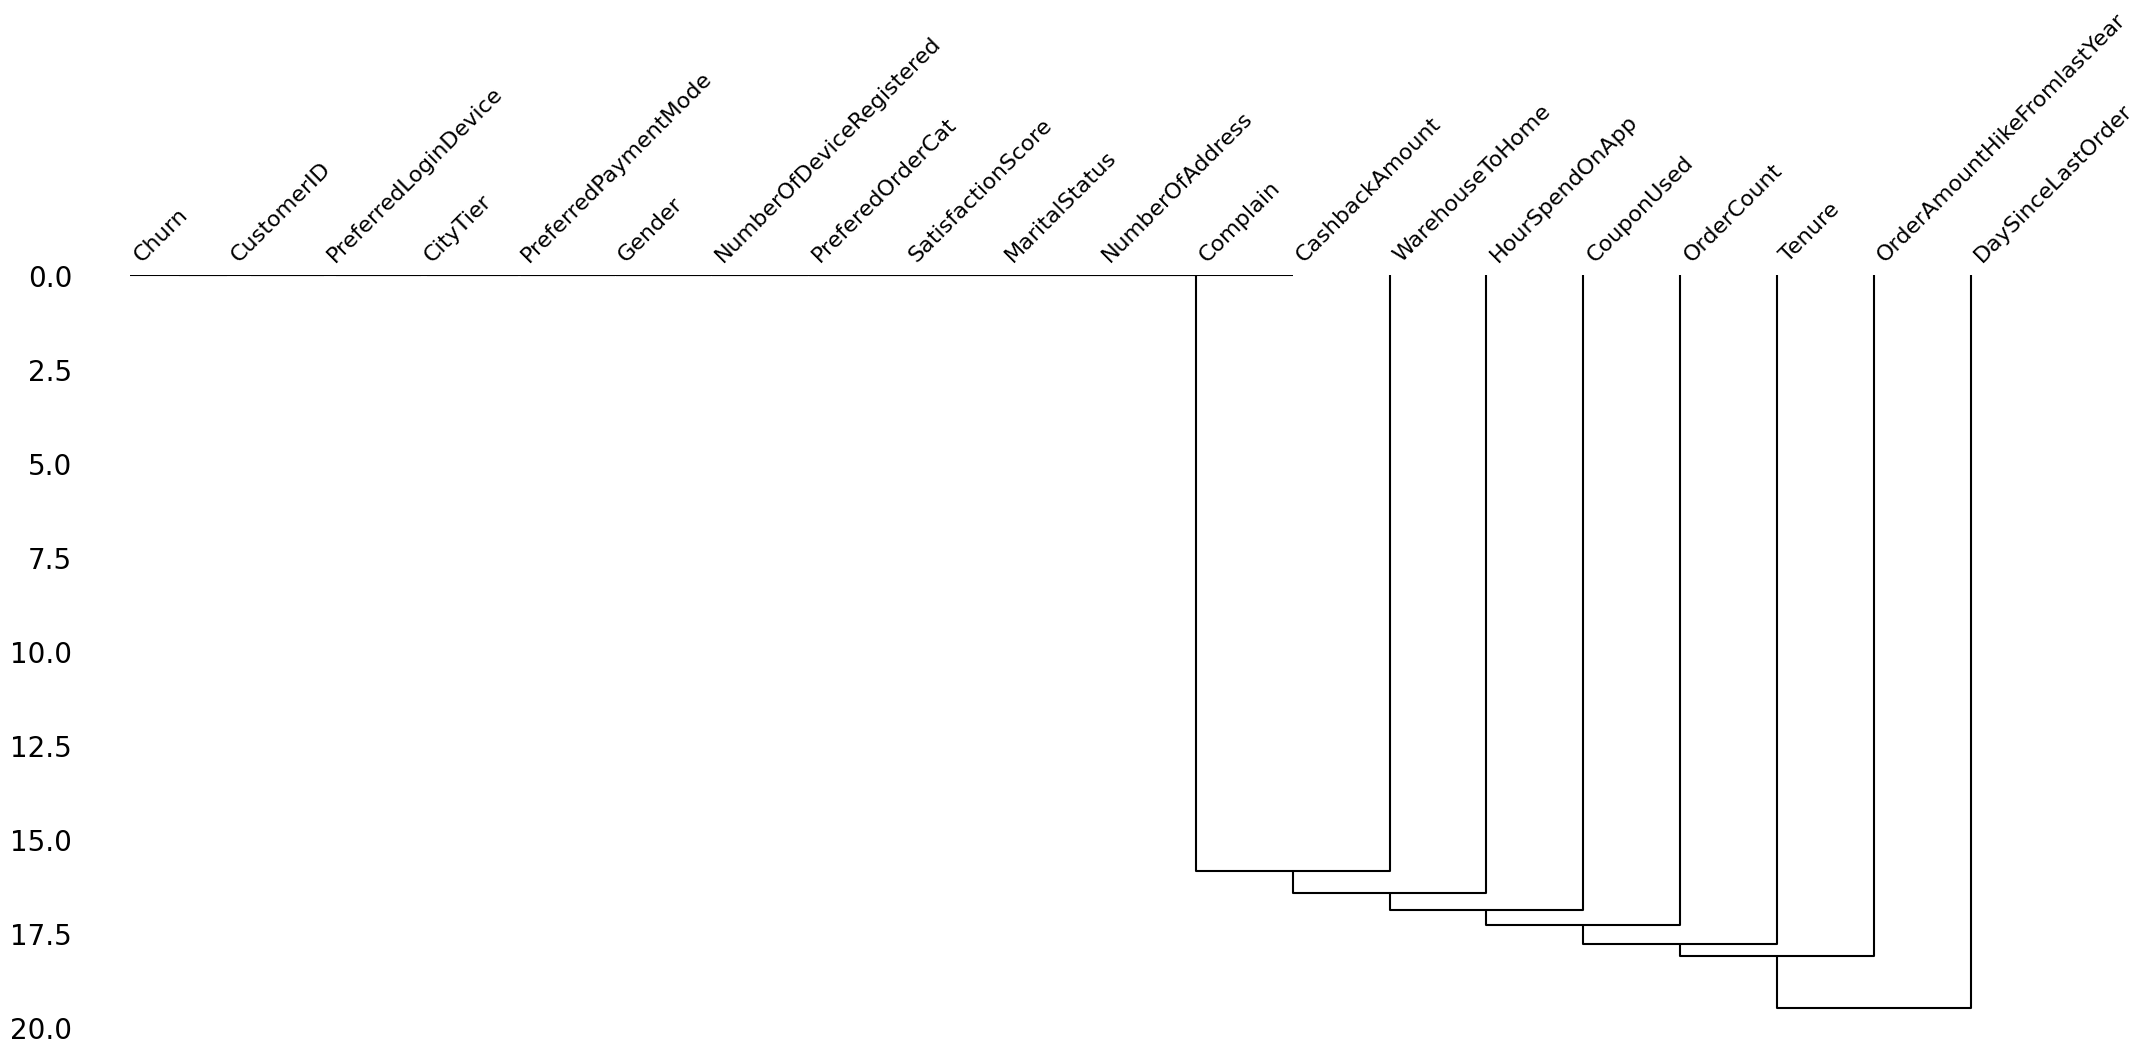

In [ ]:
missingno.dendrogram(df)
plt.show()

Based on the dendrogram above, the result is the same as the heatmap, which is that there is no correlation or relationship between the missing values.

In [ ]:
#df_analisa = df.fillna(df.mode().iloc[0])
df_analisa=df.dropna()

In [ ]:
df_analisa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [ ]:
excel_file_path = 'cleaned_dataset.xlsx'
df_analisa.to_excel(excel_file_path, index=False)

print(f"Cleaned dataset saved to {excel_file_path}")

Cleaned dataset saved to cleaned_dataset.xlsx


In [ ]:
df.drop(['CustomerID'],axis=1, inplace=True)

As explained above, `CustomerID` will be dropped on the grounds that this feature is not needed in either EDA or ML (Machine Learning)

## 4. Exploratory Data Analysis


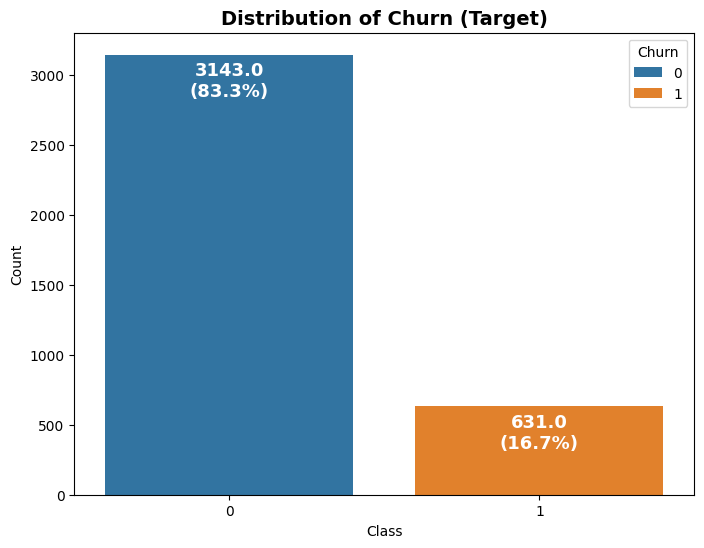

In [ ]:
plt.figure(figsize=(8,6))
total = len(df_analisa)
ax = sns.countplot(data=df_analisa, x='Churn',hue='Churn')

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() - 50),
                ha='center', va='top', color='white', size=13, weight='bold')

plt.title('Distribution of Churn (Target)', size=14, weight='bold')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

plt.show()


In this dataset, we can find out that 16.7% of customers abandoned this ecommerce service. This figure also shows that the Churn variable which is the target in modeling has moderate imbalance data. This imbalanced data needs to be treated so that when modeling is carried out, the algorithm does not learn more only on negative class data (class 0).

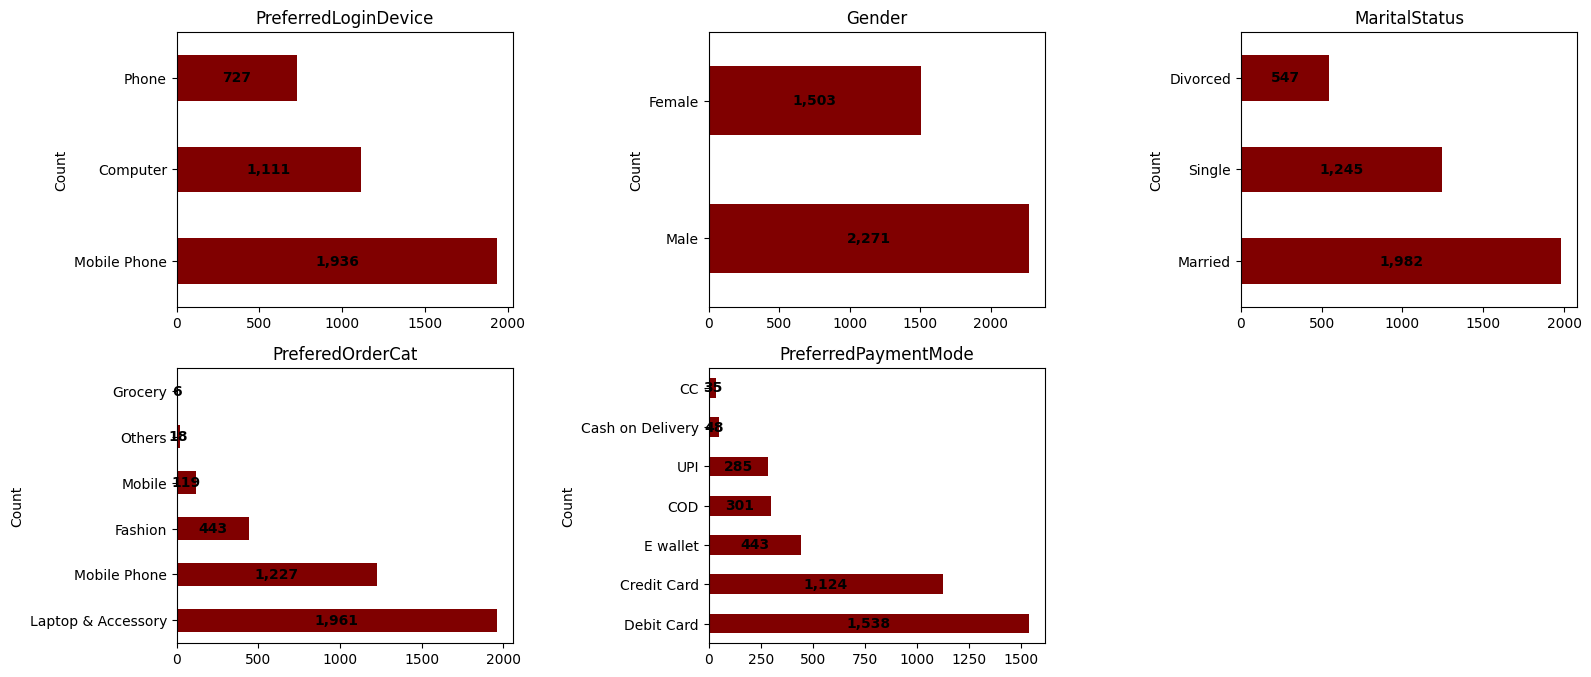

In [ ]:
categorical_viz = ['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']

# Categorical variable visualization
fig = plt.figure(figsize=(16,10))
subplot = 1

for cat in categorical_viz:
    ax = plt.subplot(3,3,subplot)
    ax = df_analisa[cat].value_counts().plot(kind='barh', color=['maroon'])
    plt.ylabel('Count')
    plt.xlabel(None)
    plt.title(cat, size=12)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='center', padding = 0, color="black", fontweight='bold')
    plt.tight_layout(w_pad = 3)
    subplot+=1

After merging values ​​that have similar writing, the following are the insights from the visualization of categorical variables:

  - Customers prefer to access this ecommerce application via mobile phone (PreferredLoginDevice).
  - For the payment system, more customers use Debit Cards in their transactions. (PreferredPaymentMode)
  - The customers in this data are also more male than female (Gender).
  - Based on transactions in the last month, customers purchased more Mobile Phones and continued with purchases of Laptops & Accessories (PreferredOrderCat).
  - At MaritalStatus, more customers are married than single and divorced.

### Heatmap

Strength of correlation:

  - 0 - 0.2: very weak
  - 0.2 - 0.4: weak
  - 0.4 - 0.6: moderate
  - 0.6 - 0.8: strong
  - 0.8 - 1.0: very strong

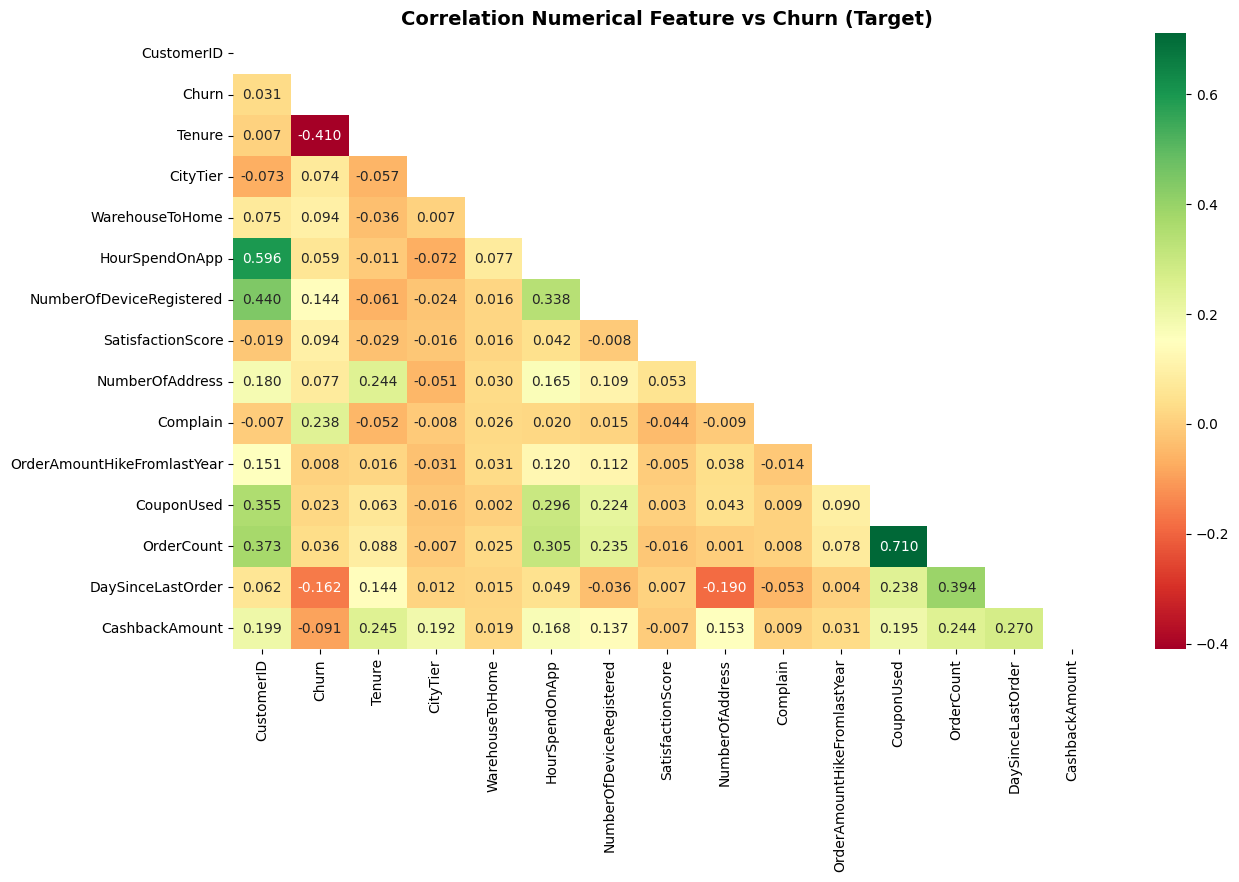

In [ ]:
corr = df_analisa.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(14,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=14, weight='bold');

Insights:

- Negative Correlation with Tenure:

    There is a moderate negative correlation between Churn and Tenure (-0.41). This indicates that customers with longer tenure are less likely to churn.

- Positive Correlation with Complaints:

    There is a moderate positive correlation between Churn and Complain (0.25). Customers who have complaints are more likely to churn.

- Negative Correlation with Day Since Last Order:

    There is a weak negative correlation between Churn and DaySinceLastOrder (-0.162). Customers who placed an order recently are less likely to churn.

- Negative Correlation with Cashback Amount:

    There is a weak negative correlation between Churn and CashbackAmount (-0.091). Higher cashback amounts might reduce the likelihood of churn

## 5. Data Analysis

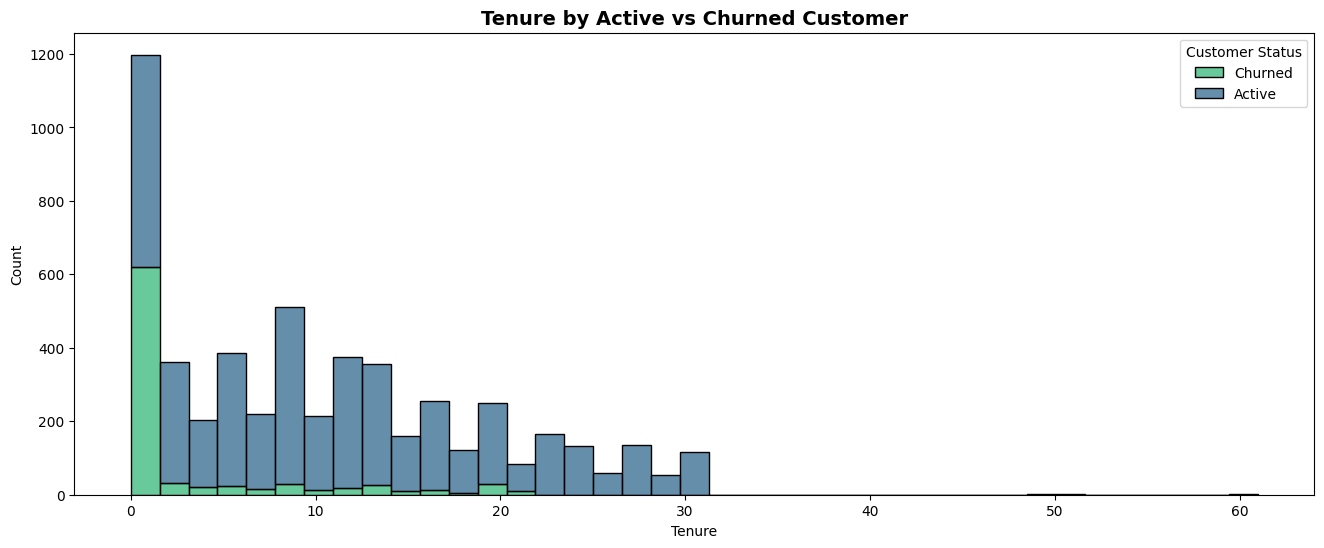

In [ ]:
# Tenure vs Churn
plt.figure(figsize=(16, 6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', palette='viridis')
ax.set_title('Tenure by Active vs Churned Customer', size=14, weight='bold')
ax.set_xlabel('Tenure')
ax.set_ylabel('Count')
plt.legend(title='Customer Status', labels=['Churned', 'Active'])
plt.show()


Because Tenure has the strongest negative correlation with Churn, with the histogram visualization above we know that the rate of use of ecommerce services has increased in under 2 months. This can be assumed because customers are initially interested in the services provided by e-commerce.

However, if we look at Churn, it turns out that the initial assumption was correct, where the number of customers who stopped using e-commerce services in under 2 months was higher than in other periods. If you look at the table, the percentage of customers who stop using ecommerce services is more than 50% of the total users under 2 months. Customer churn at the beginning of such a period can be called early-life churn. Based on domain knowledge, in the initial period of using a service, customers often stop using the service for various reasons, such as:

  - Unsatisfactory customer support (sometimes to the point of not solving problems),
  - Product availability in ecommerce,
  - Quality of ecommerce services (e.g. payment process, shipping process), and others.
  - Promotion used by customers in this eccommerce platform are less satisfactory such as coupon or discount

<ipython-input-26-c578ba9e1318>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OrderCount', y='CouponUsed', data=df_analisa, ci=None)


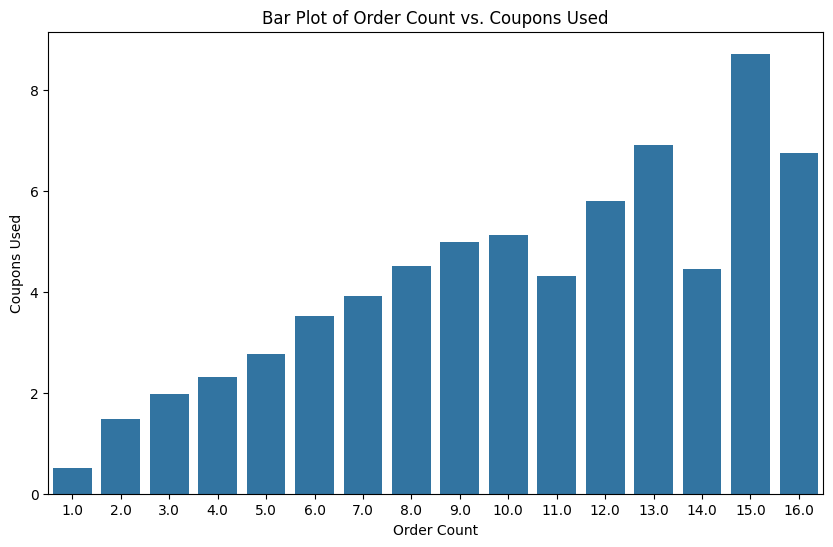

In [ ]:
# OrderCount vs CouponUsed
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderCount', y='CouponUsed', data=df_analisa, ci=None)
plt.title('Bar Plot of Order Count vs. Coupons Used')
plt.xlabel('Order Count')
plt.ylabel('Coupons Used')
plt.show()



There is a general upward trend in the number of coupons used as the order count increases. This suggests that customers who place more orders tend to use more coupons.

The highest coupon usage is seen in the customers with the highest order counts (15 and 16 orders). These customers are likely highly engaged and value the coupons offered.

There is some variability in coupon usage across different order counts. For example, customers with 11, 12, and 14 orders have lower coupon usage compared to those with 13, 15, and 16 orders.

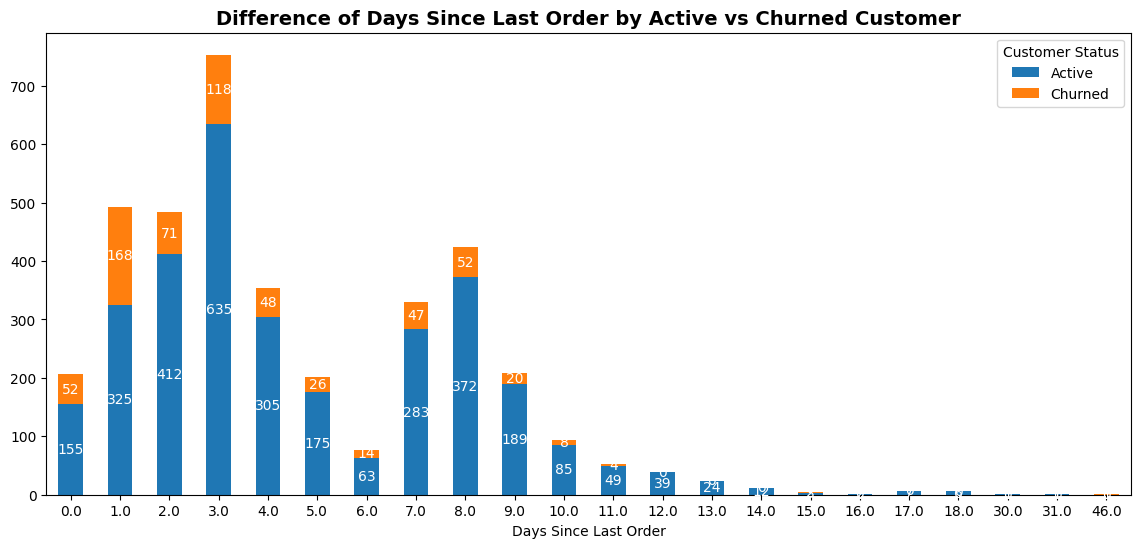

In [ ]:
# Bar Chart for Churn vs. Day Since Last Order
#normalize=True
plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
order_churn = df_analisa.groupby('DaySinceLastOrder')['Churn'].value_counts().unstack('Churn').fillna(0)
order_churn.plot.bar(stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.xticks(rotation=0)
plt.xlabel('Days Since Last Order')
plt.legend(title='Customer Status', labels=['Active', 'Churned'], loc='upper right')
plt.title('Difference of Days Since Last Order by Active vs Churned Customer', size=14, weight='bold')

# Adding labels
for i, (active, churned) in enumerate(zip(order_churn[0], order_churn[1])):
    ax.text(i, active / 2, f'{int(active)}', ha='center', va='center', color='white')
    ax.text(i, active + churned / 2, f'{int(churned)}', ha='center', va='center', color='white')

plt.show()

Insights:

The proportion of churned customers appears to increase as the number of days since the last order increases. For example, there is a noticeable presence of churned customers at 2-3 days since the last order, and this proportion seems to increase significantly around 6-8 days.

A significant number of customers (both active and churned) have made recent purchases, specifically within 0-4 days. However, even within this group, there are still some churned customers, indicating that churn can occur even shortly after a purchase.

The number of active customers declines as the days since the last order increase, indicating that fewer customers remain engaged after a longer period without making a purchase. This trend continues up to around 10 days, with a very small number of customers remaining active or churning afterward.

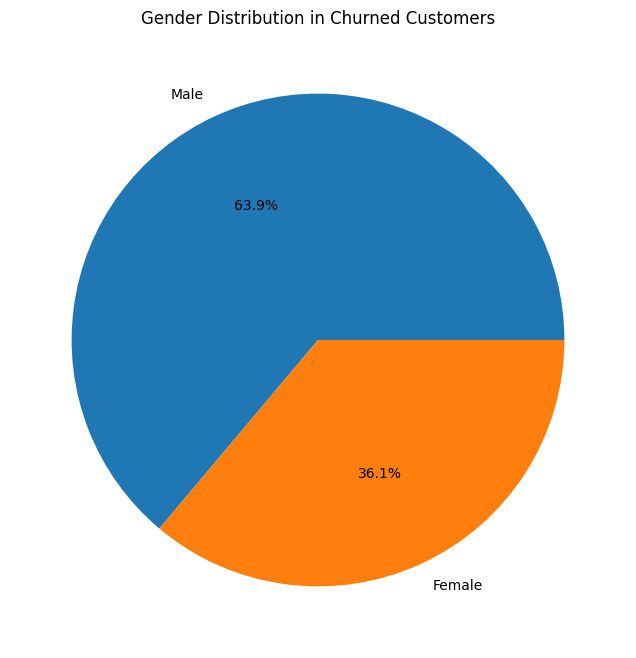

In [ ]:
# Pie Chart for Gender Distribution in Churned Customers
churned = df_analisa[df_analisa['Churn'] == 1]
plt.figure(figsize=(8, 8))
churned['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution in Churned Customers')
plt.ylabel('')
plt.show()

The pie chart indicates that 63.9% of the churned customers are male, while 36.1% are female. This suggests that male customers are more likely to churn compared to female customers in your e-commerce platform.

Since a larger proportion of churned customers are male, develop targeted retention strategies aimed specifically at male customers. This could include personalized offers, loyalty programs, or product recommendations that cater to male preferences.

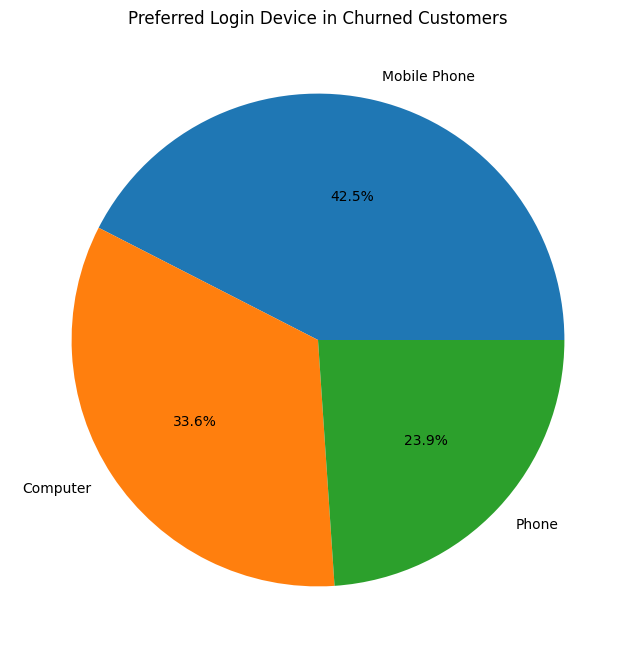

In [ ]:
# Pie Chart for Preferred Login Device in Churned Customers
plt.figure(figsize=(8, 8))
churned['PreferredLoginDevice'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Preferred Login Device in Churned Customers')
plt.ylabel('')
plt.show()

Then, based on the device used to log in to the ecommerce application where the customers are churned, they mostly used mobile phone (42,5%) and personal computers (33,6%). This could be caused by an unpleasant user experience for customers who access e-commerce via mobile phone orcomputer. However, it would be better if a cohort analysis was carried out to see the number of logged in users (both using computers and cellphones) based on a certain period. Apart from that, companies can also review the UI/UX of this e-commerce application to provide a better experience for customers.

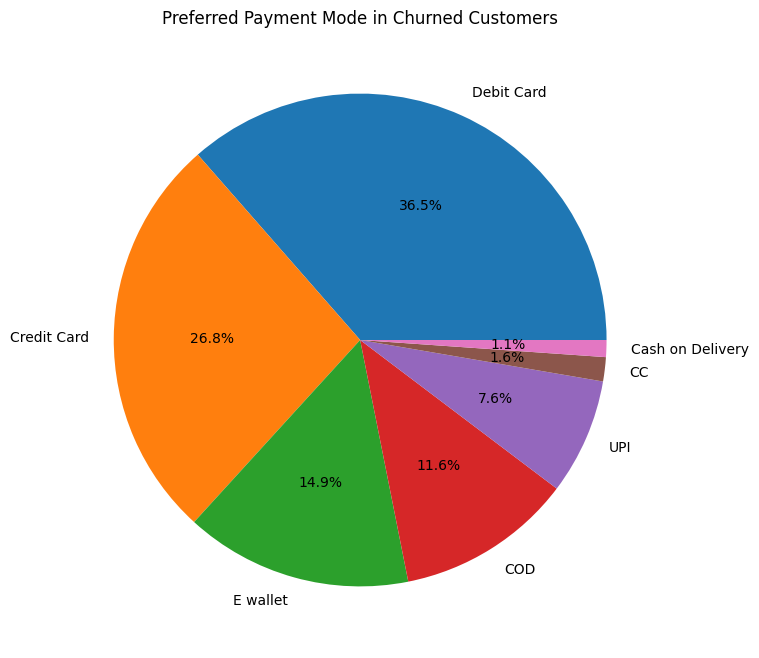

In [ ]:
# Pie Chart for Preferred Payment Mode in Churned Customers
plt.figure(figsize=(8, 8))
churned['PreferredPaymentMode'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Preferred Payment Mode in Churned Customers')
plt.ylabel('')
plt.show()

Insight:

The most preferred payment method among churned customers is the Debit Card, accounting for 36.5% of the total.

Since a large percentage of churned customers use digital payment methods, it could imply potential issues or dissatisfaction with these payment methods or related services that might contribute to churn. This could be an area for further investigation to understand the underlying causes.

The low usage of methods like Cash on Delivery and Credit Card on Delivery suggests that these methods are not popular among churned customers. Understanding why these methods are less preferred might offer additional insights into customer behavior and preferences.

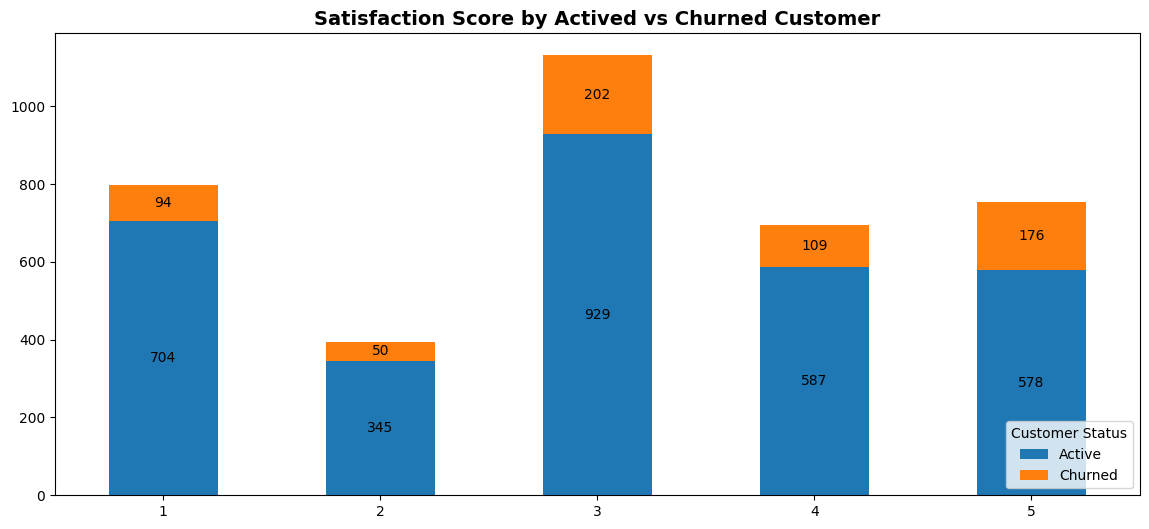

In [ ]:
# Graph for Satisfaction Score
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
satisfaction_churn = df_analisa.groupby('SatisfactionScore')['Churn'].value_counts().unstack('Churn')
satisfaction_churn.plot.bar(stacked=True, ax= ax)
plt.title('Satisfaction Score by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Active', 'Churned'], loc='lower right')
# Add labels
for i in range(len(satisfaction_churn)):
    total = 0
    for j in range(len(satisfaction_churn.columns)):
        value = satisfaction_churn.iloc[i, j]
        if value > 0:
            ax.annotate(f'{value}', xy=(i, total + value/2), ha='center', va='center')
            total += value

plt.show()

Insights:

The highest number of customers fall within the satisfaction score of 3. Out of these, 17.9% (202 out of 1131) have churned, which is significantly higher compared to other satisfaction scores.

For a satisfaction score of 4, 15.6% (109 out of 696) have churned, and for a satisfaction score of 5, 23.3% (176 out of 754) have churned.

For this issue, company can implement or enhance loyalty programs to reward high satisfaction customers. This will encourage them to remain loyal and continue their engagement with your brand.

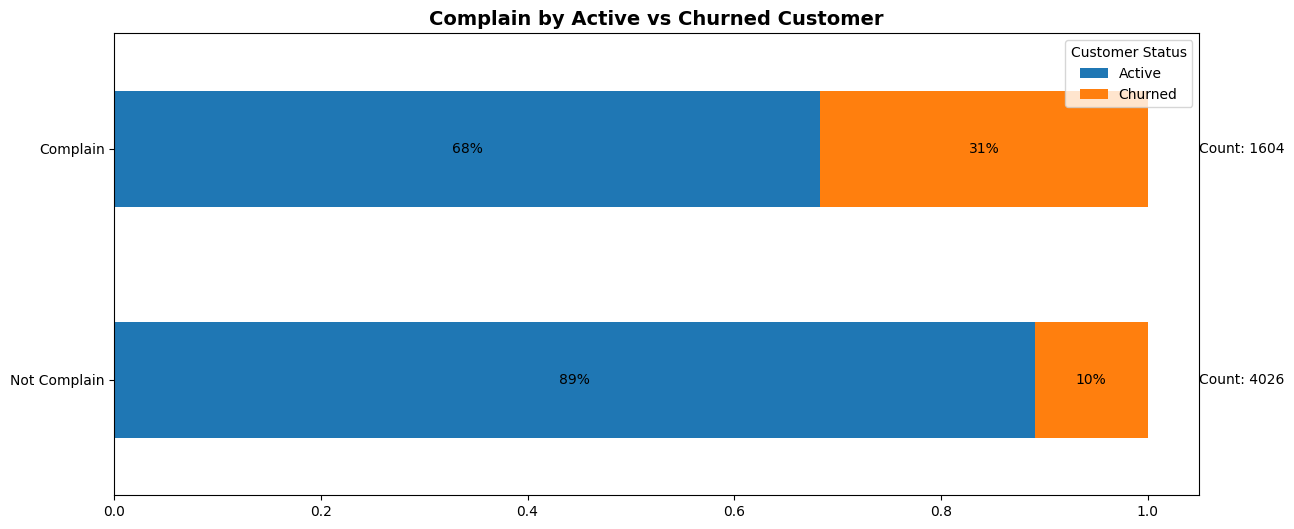

In [ ]:
plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn').fillna(0)
complain_churn.plot.barh(stacked=True, ax=ax)
plt.title('Complain by Active vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Active', 'Churned'], loc='upper right')

# Adding percentage labels
for ix, row in complain_churn.iterrows():
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(round(element, 3) * 100)}%",
                va="center",
                ha="center",
            )
        cumulative += element

# Calculate counts for each Complain category
complain_counts = df['Complain'].value_counts().sort_index()

# Adding count labels
for i, count in enumerate(complain_counts):
    plt.text(
        1.05,  # Positioning the text slightly outside the bar
        i,     # Corresponding y position (bar index)
        f'Count: {count}',
        va="center",
        ha="left"
    )

plt.show()


Insights:

- The proportion of customers who file a complaint is higher to stop using e-commerce services by 31.7% (3x, in proportion) than those who do not file a complaint. We know that customers who file complaints are customers who often experience dissatisfaction with the services provided, so it is very possible for customers to switch to competitors.

- Therefore, companies need to review the customer support procedures they currently have and improve customer support services better so as to minimize churn.

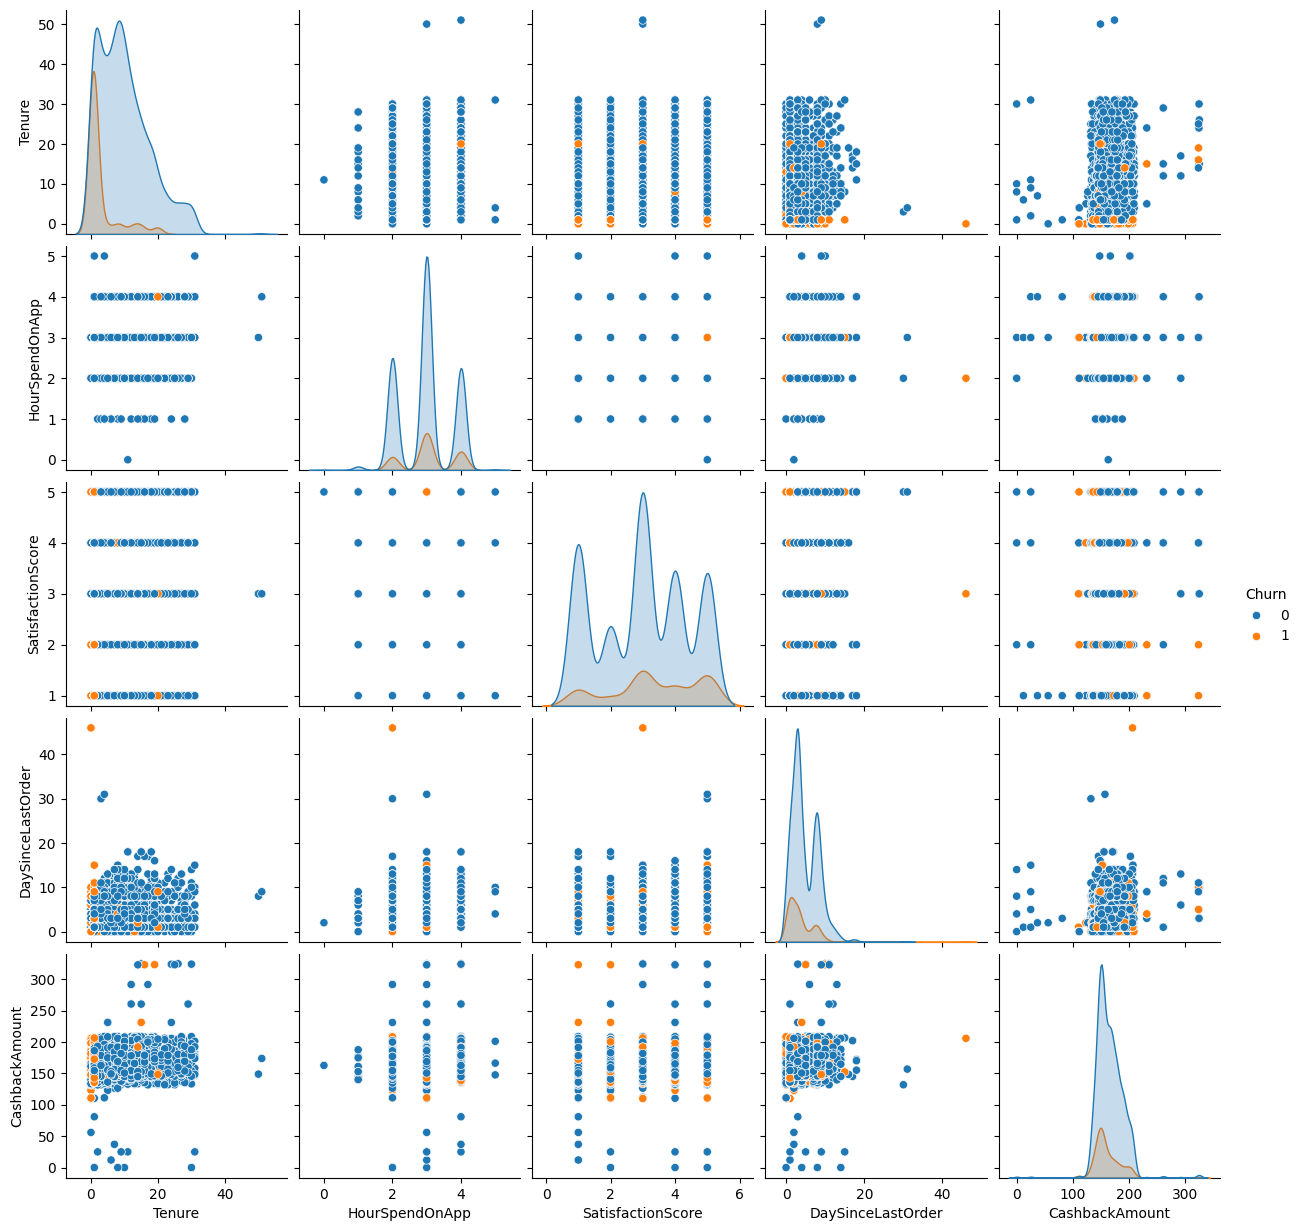

In [ ]:
# Pair Plot for Selected Features
selected_features = ['Tenure', 'HourSpendOnApp', 'SatisfactionScore', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
sns.pairplot(df_analisa[selected_features], hue='Churn')
plt.show()

- Tenure and SatisfactionScore:

    There is a clear pattern where higher tenure customers tend to have higher satisfaction scores and are less likely to churn.

- Tenure and DaySinceLastOrder:

    Customers with longer tenures tend to have a wider range of days since their last order, with fewer instances of churn among those with higher tenure.

- SatisfactionScore and DaySinceLastOrder:

    Lower satisfaction scores are more prevalent among churned customers, regardless of the number of days since their last order.

- DaySinceLastOrder and CashbackAmount:

    There is a notable cluster of churned customers with lower cashback amounts and fewer days since their last order.

## 6. Machine Learning : Classification

### 6.1 Data Preprocessing

In [ ]:
#Initialize Library

# preprocessing
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# pipeline and transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

# imbalance preprocessing
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

# model selection
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

#---- Initialize estimators -----#
logreg = LogisticRegression(random_state = 0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state= 0)
rf = RandomForestClassifier(random_state= 0)
xgb = XGBClassifier(random_state= 0)

# initialize resampler
# oversampler
ros = RandomOverSampler(random_state=48)
smote = SMOTE(random_state=48)
#undersampler
rus = RandomUnderSampler(random_state=48)
cnn = CondensedNearestNeighbour(random_state=48)
#hybrid
smotenn = SMOTEENN(random_state=48)

#kfold
skf = StratifiedKFold(n_splits=5)

#model saving
import pickle

Preprocessing is a necessarry step for machine learning modeling. In this section, preprocessing consists of encoding categoric data, and scaling numerical data. Encoding transforms categoric features in to numerical representation. Scaling transforms numerical data by reducing its range while maintaining the variance between data.

Preprocessing also consists of seperating the data between features and target, and splitting features and target in to training and testing data. Training data is used to teach the machine learning model to make predictions without explicitly programming it to perform the task. While testing data provides an independent assessment of a trained model's performance.

In [ ]:
# initialize column transformer
transformer = ColumnTransformer(transformers=[
    ('encoder_OHE',OneHotEncoder(handle_unknown='infrequent_if_exist'),['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus',]),
    ('scaler_robust',RobustScaler(),['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'])
],remainder='passthrough')

This model uses OneHotEncoder and RobustScaler:
- OneHotEncoder (OHE): an encoder where each value of a categoric feature is transformed in to a column/feature. OHE is very intrepretable but faces dimensionality issues with categoric features with a large amount of unique values. We will use OHE to encode `PreferredLoginDevice`,`PreferredPaymentMode`, `Gender`, `PreferredOrderCat`, and `MaritalStatus`.
- RobustScaler (RS): a scaler using quantile and inter quantile range. RS is less susceptible to outliers. We will use RS to scale all continuous numerical features with some exceptions.
- passthrough: Several features, despite being numerical features, have ordinal or binary characteristics. The values within these features represent a ranking of values, the existance of something, or a whole amount of things. These features are not to be scaled as doing so might lead to loss information or misinformation. These features are: `CityTier`, `SatisfactionScore`, and `Complain`

In [ ]:
# Remove rows with any NaN values
df_clean = df.dropna()

#seperate features and target
#feature= df_clean.drop(['Churn','CustomerID'],axis=1)
feature= df_clean.drop(['Churn'],axis=1)
target = df_clean['Churn']


In [ ]:
#split data in to training and testing data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=48)

print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (3019, 18)
y_train:  (3019,)
X_test:  (755, 18)
y_test:  (755,)


In [ ]:
model = imb_pipeline(steps=[
    ('transformer',transformer),
    ('resampler',logreg),
    ('estimator',ros)
])

### 6.3 Model Benchmarking

In this section we will determine which estimator to use for our machine learning model. To do that, we will be using k-fold cross-validation and grid search

K-fold Cross-validations is a technique where training data is divided in to k (5 by default) sub-sets, then each sub-set take turns becoming the validation data (where the model tries to predict its target as accurately as possible) while the rest become training data for the machine learning model, This process iterates until all sub-sets have had a turn as validation data. The purpose of this technique is to give a better estimate on the stability and consistency of a model's performance.

In [ ]:
list_estimator = [logreg,knn, dt, rf,xgb]

list_resampler = [None, ros, smote, rus, cnn, smotenn]

In [ ]:
param_space = {
    'resampler':list_resampler,
    'estimator':list_estimator
}

In [ ]:
gridSearch_benchmark = GridSearchCV(
    estimator=model,
    param_grid=param_space,
    cv=skf,
    scoring=['recall','precision','f1'],
    refit='f1',
    return_train_score=True,
    verbose=1
)

gridSearch_benchmark

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_OHE',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('scaler_robust',...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=0, ...)],
                         'resampler': [None, RandomOverSampler(random_state=48),
                                       SMOTE(random_state=48),
                                       RandomUnderSampler(random_state=48),
                                       CondensedNearestNeighbour(random_state=48),
                                       SMOTEENN(random_state=48)]},
             refit='f1', return_train_score=True,
             scoring=['recall', 'precision', 'f1'], verbose=1)

In [ ]:
gridSearch_benchmark.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_OHE',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('scaler_robust',...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=0, ...)],
                         'resampler': [None, RandomOverSampler(random_state=48),
                                       SMOTE(random_state=48),
                                       RandomUnderSampler(random_state=48),
                                       CondensedNearestNeighbour(random_state=48),
                                       SMOTEENN(random_state=48)]},
             refit='f1', return_train_score=True,
             scoring=['recall', 'precision', 'f1'], verbose=1)

In [ ]:
pd.DataFrame(gridSearch_benchmark.cv_results_).sort_values(by='rank_test_f1')[['rank_test_f1','param_resampler','param_estimator','mean_test_f1','mean_train_f1']]

,rank_test_f1,param_resampler,param_estimator,mean_test_f1,mean_train_f1
25,1,RandomOverSampler(random_state=48),"XGBClassifier(base_score=None, booster=None, c...",0.880161,1.000000
24,2,None,"XGBClassifier(base_score=None, booster=None, c...",0.879378,1.000000
26,3,SMOTE(random_state=48),"XGBClassifier(base_score=None, booster=None, c...",0.875083,1.000000
19,4,RandomOverSampler(random_state=48),RandomForestClassifier(random_state=0),0.873365,1.000000
18,5,None,RandomForestClassifier(random_state=0),0.845779,1.000000
20,6,SMOTE(random_state=48),RandomForestClassifier(random_state=0),0.841095,1.000000
22,7,CondensedNearestNeighbour(random_state=48),RandomForestClassifier(random_state=0),0.816591,0.916672
28,8,CondensedNearestNeighbour(random_state=48),"XGBClassifier(base_score=None, booster=None, c...",0.808118,0.897576
13,9,RandomOverSampler(random_state=48),DecisionTreeClassifier(random_state=0),0.800352,1.000000
29,10,SMOTEENN(random_state=48),"XGBClassifier(base_score=None, booster=None, c...",0.788458,0.888761


It can be seen that XGBoost with Random Over Sampling is the best base model.

eXtreme Gradient Boosting (XGBoost) is an implementation of the gradient boosting algorithm with several advanced features and optimizations that enhances its performance. These are Incorporating Lasso and Ridge regularization, parallel tree construction, Tree pruning, and more.

Random Over Sampling (ROS) is a technique used to address class imbalance in a dataset. This is done by randomly duplicating instances of the minority class (in this case, class 1) until the number of data between the classes are balanced.

In [ ]:
# save the base model to a .sav file
filename = 'base_estimator_xgb.sav'

pickle.dump(gridSearch_benchmark.best_estimator_,open(filename,'wb'))
from google.colab import files
files.download('base_estimator_xgb.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.4 Hyperparameter tuning

In [ ]:
param_space = {
    'estimator':[xgb],
    'resampler':[ros],
    'estimator__booster':['gbtree','dart'],
    'estimator__n_estimators':[100,150,200],
    'estimator__max_depth':[5,10,15],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__gamma': [0, 0.1, 0.2],
}
gridSearch_tuning_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_space,
    cv=skf,
    scoring=['recall','precision','f1'],
    refit='f1',
    return_train_score=True,
    verbose=2
)
gridSearch_tuning_xgb

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_OHE',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('scaler_robust',...
                                                     num_parallel_tree=None,
                                                     random_state=0, ...)],
                         'estimator__booster': ['gbtree', 'dart'],
                         'estimator__gamma': [0, 0.1, 0.2],
                         'estimator__learning_rate': [0.01, 0.1, 0.2],
                         'estimator__max_depth': [5, 10, 15],
                         'estimator__n_estimators': [100, 150, 200],
                         'resampler': [RandomOverSampler(random_state=48)]},
             refit='f1', return_train_score=True,
             scoring=['recall', 'precision', 'f1'], verbose=2)

In [ ]:
gridSearch_tuning_xgb.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...), estimator__booster=gbtree, estimator__gamma=0.1, estimator__learning_rate=0.01, estimator__max_depth=10, estimator__n_estimators=100, resampler=RandomOverSampler(random_state=48); total time=   0.3s
[CV] END estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=Non

In [ ]:
pd.DataFrame(gridSearch_tuning_xgb.cv_results_).sort_values(by='rank_test_f1')[[
    'rank_test_f1',
    'param_estimator',
    'param_estimator__booster',
    'param_estimator__n_estimators',
    'param_estimator__max_depth',
    'param_estimator__learning_rate',
    'param_estimator__gamma',
    'mean_test_f1',
    'mean_train_f1']]

The grid search method has found that Extreme Gradient Boost(XGB) with the following hyperparameters:

|Name|Value|
|-|-|
|booster|dart|
|n_estimators|150|
|max_depth|15|
|learning_rate|0.2|
|gamma|0|


 has the best performance for customer churn prediction, with an average f1 test score of 0.89.

In [ ]:
#save the best tuned estimator
filename = 'tuned_estimator_xgb.sav'

pickle.dump(gridSearch_tuning_xgb.best_estimator_,open(filename,'wb'))
from google.colab import files
files.download('tuned_estimator_xgb.sav')

## 6.5 Model Evaluation

In this section we will now compare the performance of base xgb model with the tuned xgb model and see if there is any improvement and by how much. We will be using the evaluation metrics mentioned in section `1.5` to evaluate the performance of the aforementioned models.

In [ ]:
#load models
# # load base estimator
with open('base_estimator_xgb.sav','rb') as file:
    base_xgb = pickle.load(file)

#load estimator w/ tuning
with open('tuned_estimator_xgb.sav','rb') as file:
    tuned_xgb = pickle.load(file)


In [ ]:
# store the best estimator of both gridsearch in to its own variables.
# base_xgb = gridSearch_benchmark.best_estimator_
# tuned_xgb = gridSearch_tuning_xgb.best_estimator_

In [ ]:
#create predictions using each models
y_pred_base = base_xgb.predict(X_test)
y_pred_tuned = tuned_xgb.predict(X_test)


In [ ]:
#Test base xgb performance
print('Classification report :')
print(classification_report(y_test,y_pred_base))

Classification report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       630
           1       0.89      0.92      0.91       125

    accuracy                           0.97       755
   macro avg       0.94      0.95      0.94       755
weighted avg       0.97      0.97      0.97       755



In [ ]:
#Test tuned xgb performance
print('Classification report :')
print(classification_report(y_test,y_pred_tuned))

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       630
           1       0.89      0.93      0.91       125

    accuracy                           0.97       755
   macro avg       0.94      0.95      0.94       755
weighted avg       0.97      0.97      0.97       755



Based on the classification report of both the base and tuned model, specifically looking at the f1-score of churn (1) class. We can see that both models have the same score of `0.91`, which means both models performs the same based of the metric evaluation we have set.

## 6.7 Model Summary

In this section we will analyze which features significantly effect how the model predict used car prices using SHAP. SHAP (SHapley Additive exPlanations) is a powerful technique used in machine learning for explaining the output of a model by attributing the importance of each feature to the model's predictions.

In [ ]:
#initialize preprocessed X_test
X_test_trans=pd.DataFrame(
    base_xgb.named_steps['transformer']
    .transform(X_test),
    columns=tuned_xgb
    .named_steps['transformer']
    .get_feature_names_out())

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.5 MB/s eta 0:00:00


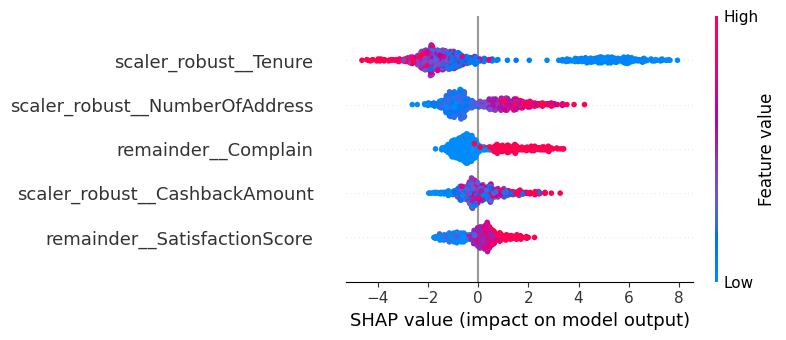

In [ ]:
import shap
shap.initjs()
#put tuned lgbm estimator in to a variable
xgb_clf= base_xgb.named_steps['estimator']

#use shap.TreeExplainer to visualize feature importances
shap_values = shap.TreeExplainer(xgb_reg,
                                data = X_test_trans,
                                model_output="raw"
                                ).shap_values(X_test_trans)
shap.summary_plot(shap_values, X_test_trans,feature_names = X_test_trans.columns, max_display = 5)

from the visualization above we found that the 5 features that contribute the most to the prediction are `Tenure`, `NumberOfAdress`, `Complain`, `SatisfactionScore` and `CashbackAmount`.

- Tenure: The lower the Tenure value, the more likely the customer churns, conversely the higher the Tenure value the less likely the customer churns. This indicates that customers with low Tenure will most likely Churn
- NumberOfAdress: The higher the NumberOfAdress value, the more likely the customer churns, conversely the lower the NumberOfAdress value, the less likely the customer churns. This indicates customers that have multiple adressess are more likely to churn.
- Complain: Complain's value are between 1 and 0, Thus if the customer complain, they are more likely to Churn. Conversely if they have no complaints, then they are less likely to Churn.
- SatisfactionScore: In many cases, the higher the SatisfactionScore, the more likely the customer churns. Conversely the lower the SatisfactionScore, the less likely the customer churns. This indicates that customers that provide a higher SatisfactionScore are more likely to Churn.
- CashbackAmount: In many cases, The higher the CashbackAmount value, the more likely a customer churns. Conversely the lower the CashbackAmount, the less likely a customer churns. This indicates that customers with large does transactions with large amount of cashbacks are likely to Churn.

Insight:
- NumberOfAdress: A high number of addresses indicates that the customer move around a lot. Either they move often or do not have a permanent residence. It is quite possible that the customer moved to a location that is outside the company's delivery range, which causes to the customer to stop purchasing from the company.
- SatisfactionScore: Logically speaking, higher SatisfactionScore should mean lower chance of Churn. However high SatisfactionScore instead increases the likelihood of Churn. This indicates there is a failure to retain satisfied customers.
- CashbackAmount: This suggests that customers that takes advantage of the cashback rewards by a large amount are the more likely to churn. Which indicates that customers who are attracted with Cashback rewards are harder to retain. It is very likely that these types of customer require frequent cashback rewards to reduce the likelyhood of churn.

### 6.8 Residual Analysis

In [ ]:
X_test_resid = X_test_trans.copy()
X_test_resid['Churn_pred'] = y_pred_base
X_test_resid['Churn'] = y_test.reset_index(drop=True)

In [ ]:
X_test_resid= X_test_resid.loc[X_test_resid['Churn_pred']!=X_test_resid['Churn']].reset_index(drop=True)
X_test_resid.head(3)

,encoder_OHE__PreferredLoginDevice_Computer,encoder_OHE__PreferredLoginDevice_Mobile Phone,encoder_OHE__PreferredLoginDevice_Phone,encoder_OHE__PreferredPaymentMode_CC,encoder_OHE__PreferredPaymentMode_COD,encoder_OHE__PreferredPaymentMode_Cash on Delivery,encoder_OHE__PreferredPaymentMode_Credit Card,encoder_OHE__PreferredPaymentMode_Debit Card,encoder_OHE__PreferredPaymentMode_E wallet,encoder_OHE__PreferredPaymentMode_UPI,...,scaler_robust__OrderAmountHikeFromlastYear,scaler_robust__CouponUsed,scaler_robust__OrderCount,scaler_robust__DaySinceLastOrder,scaler_robust__CashbackAmount,remainder__CityTier,remainder__SatisfactionScore,remainder__Complain,Churn_pred,Churn
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.4,1.0,0.0,-0.4,-0.678386,1.0,3.0,0.0,1,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.2,1.090239,3.0,3.0,1.0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.6,1.0,0.0,-0.2,-0.727608,1.0,2.0,1.0,1,0


In [ ]:
#define function for visualizing individual prediction
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [ ]:
shap.initjs()
print(f"The predicted label is {X_test_resid.loc[0,'Churn_pred']}, the actual label is {X_test_resid.loc[0,'Churn']}")

shap_plot(0,xgb_clf,X_test_resid.iloc[:,:-2])

The predicted label is 1, the actual label is 0


The 1st residual observation where the prediction is 1 while the actual is 0, has `Tenure=-0.64`, `Complain = 0` and `MaritalStatus = Single` as the 3 highest contributing features.

From this observation, we found that the model may predict wrong on not churn customers with low tenure values.

In [ ]:
shap.initjs()
print(f"The predicted label is {X_test_resid.loc[1,'Churn_pred']}, the actual label is {X_test_resid.loc[1,'Churn']}")

shap_plot(1,xgb_clf,X_test_resid.iloc[:,:-2])

The predicted label is 0, the actual label is 1


The 2nd residual observation where the prediction is 0 while the actual
is 1, has `Tenure=0.546`, `Complain = 1` and `CityTier = 3` as the 3 highest contributing features.

From this observation, we found that the model may predict wrong on churn customers with high tenure values.

In [ ]:
shap.initjs()
print(f"The predicted label is {X_test_resid.loc[2,'Churn_pred']}, the actual label is {X_test_resid.loc[2,'Churn']}")

shap_plot(2,xgb_clf,X_test_resid.iloc[:,:-2])

The predicted label is 1, the actual label is 0


The 3rd residual observation where the prediction is 0 while the actual is 1, has `Tenure=-0.636`, `Complain = 1` and `Number of Address = -0.25` as the 3 highest contributing features.

From this observation, we found that the model may predict wrong on not churn customers with complaints

From the 3 observations, we can conclude that the model are likely to incorrectly predict data that doesn't follow the feature characteristics explained in the model sumarry section.

### 6.9 Model Limitation

The imbalance between churn (1) and (0) which is compensated with Random Over Sampling, could cause overfitting with the machine learning model. Because Random Over Sampling only duplicates existing data of class 1. Any data with class 1 that is significantly different from training data may cause the model to predict wrong.

### 6.10 Model Implementation

The machine learning model, when implemented can be used with monthly customer data. The ML model can be hosted on the company server either through a localhosted browser or a dedicated program with python. It can be provided with customer data in an excel sheet that is collected monthly. The model will give the marketing or analyst team with the names of customers who are likely to churn. The marketing team can then devise strategies and promotions to reduce churn and evaluate the churn rate of the company.

## 7. Conclusion & Recommendation

### 7.1 Analysis & Machine Learning Conclusions:

- Male customers are more likely to churn compared to female customers in this e-commerce business.

- The number of active customers declines as the days since the last order increase, indicating that fewer customers remain engaged after a longer period without making a purchase. This trend continues up to around 10 days, with a very small number of customers remaining active or churning afterward.

- The proportion of customers who file a complaint is higher to stop using e-commerce services by 31.7% (3x, in proportion) than those who do not file a complaint.

- Tenure has the strongest negative correlation with Churn, with the histogram visualization above we know that the rate of use of ecommerce services has increased in under 2 months.

- Surprisingly, for a satisfaction score of 4, 15.6% (109 out of 696) have churned, and for a satisfaction score of 5, 23.3% (176 out of 754) have churned, which are higher than satisfaction score of 1 and 2.

- Additionally, according to the machine learning model model, `NumberOfAddress` and `CashbackAmmount` also significantly contribute to the likelihood of customer Churn

- Extreme Gradient Boost with Random Over Sampling is the best model for this problem. The base model performs similarly to the model after hyperparameter tuning.

- To evaluate the model, this analysis uses confusion matrix with emphasis on f1-score as evaluation metric. The model produced an f1-score of 0.91, which means the model can predict a customer would churn 91% of the time.

- However, it is not improbable that the error of the prediction increase because of the initial proportional imbalance between churn and not churn class. Which is compensated using random over sampling.


### 7.2 Business Recommendations:

- Improving customer service, addressing common complaints, and providing targeted offers or incentives could help reduce churn, because churn is higher among customers with lower satisfaction scores.

- Feedback collection and proactive customer engagement can help maintain and even elevate their satisfaction levels.

- Since churn seems to increase after certain gaps between orders, consider implementing a proactive engagement strategy. For example, after a customer has not made a purchase for a certain number of days (e.g., 3-5 days), send personalized offers, reminders, or incentives to encourage re-engagement.

- Improve the reliability, security, and convenience of digital payment options to reduce potential friction points that could lead to churn, because majority of customers use these methods for payment.

- For Frequent Shoppers: Continue offering attractive coupons to high-frequency shoppers (those with 15-16 orders) to maintain their engagement and loyalty.

- For Moderate Shoppers: Investigate why customers with 11, 12, and 14 orders use fewer coupons. Consider targeted campaigns or personalized offers to encourage these customers to use more coupons and increase their order frequency.

- Identify customers who have not placed an order within 1-4 days and target them with retention campaigns. Offer incentives such as discounts, free shipping, or loyalty points to encourage them to make another purchase.

- Ensure that customer support is readily available and responsive. Addressing any issues or concerns promptly can improve customer satisfaction and reduce churn.

- Ensure that all complaints are acknowledged and addressed promptly. Quick resolution of issues can prevent customers from churning. Train customer service representatives to handle complaints with empathy and provide effective solutions. Satisfied customers are more likely to remain loyal even after facing issues.

- After resolving a complaint, follow up with the customer to ensure they are satisfied with the resolution. Create a feedback loop where customers can share their post-resolution experience. Use this feedback to continually improve the complaint resolution process.

- In order to combat high churn numbers among high SatisfactionScore customers (3 and above), the company can implement or enhance loyalty programs to reward high satisfaction customers. This will encourage them to remain loyal and continue their engagement with the company.

- Expand delivery range through adding warehouses and fulfillment centers can help reach customers that have moved out of the e-commerce reach. Helping the customer to continue purchasing from the company.

- Increase the frequency of cashback rewards to customers with high Cashback reward to entice customers to continue purchasing from the company, or provide loyalty programs to these customers so that they don't rely only on cashback rewards to purchase from the company. Alternatively, steer away from relying on cashback rewards to gain customers as these types of customers are more likely to churn.

### 7.3 Project Recommendations:

- Add more data of churned customers, to reduce the imbalance between classes and for the machine learning model to better understand the characteristics of churned customers.

- Add more features, such as sign up date, date of last purchase, and more to provide more information to the analysis and machine learning model improvement.